In [32]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

Загрузка датасета

In [33]:
df = pd.read_csv('monthly-mean-temp.csv')

Описание

In [34]:
df.head()

,Month,Temperature
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        240 non-null    object 
 1   Temperature  240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [36]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


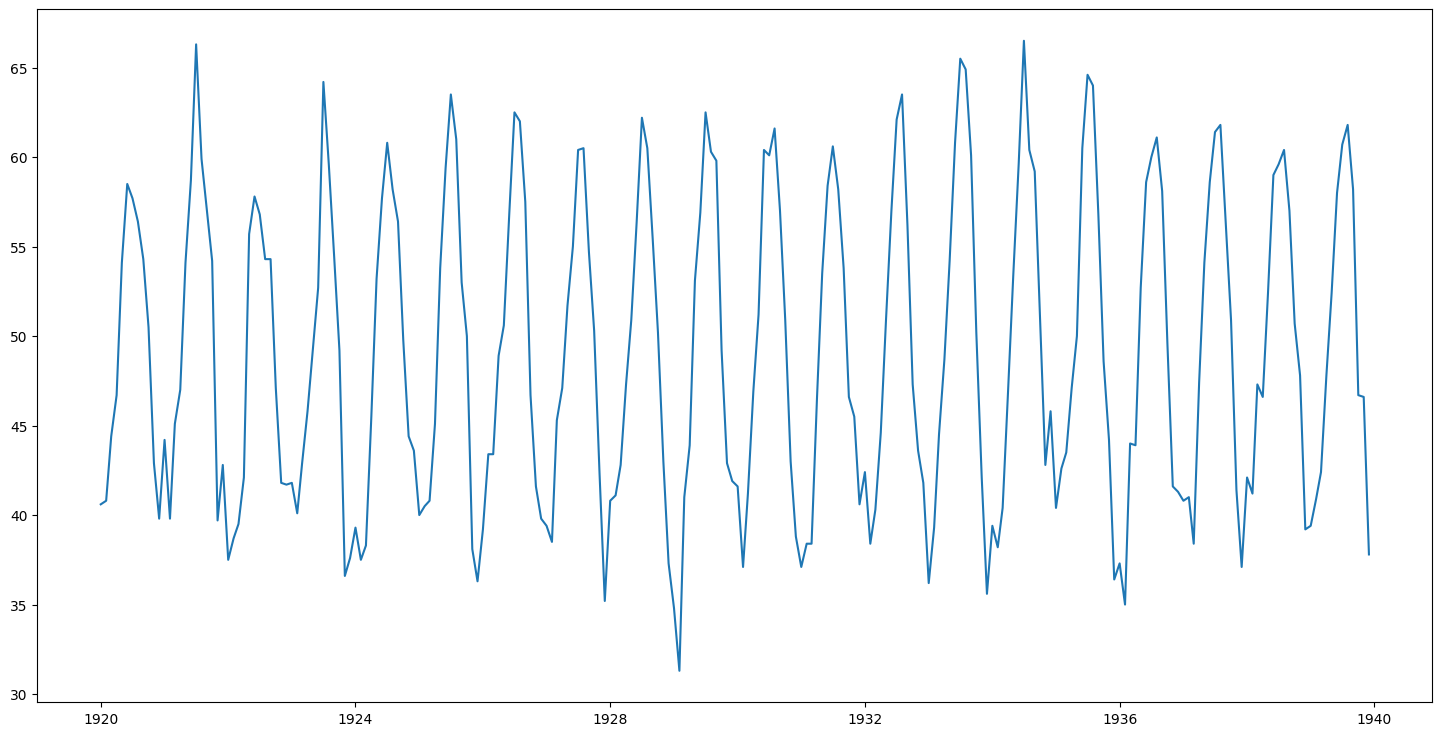

In [37]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Temperature"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

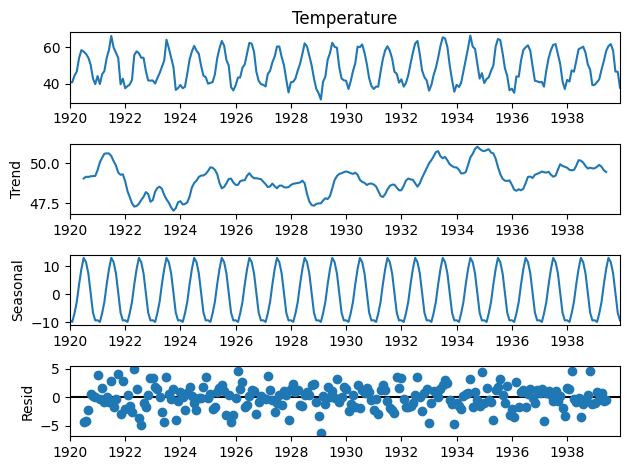

In [38]:
a = seasonal_decompose(df["Temperature"], model = "add")
a.plot();

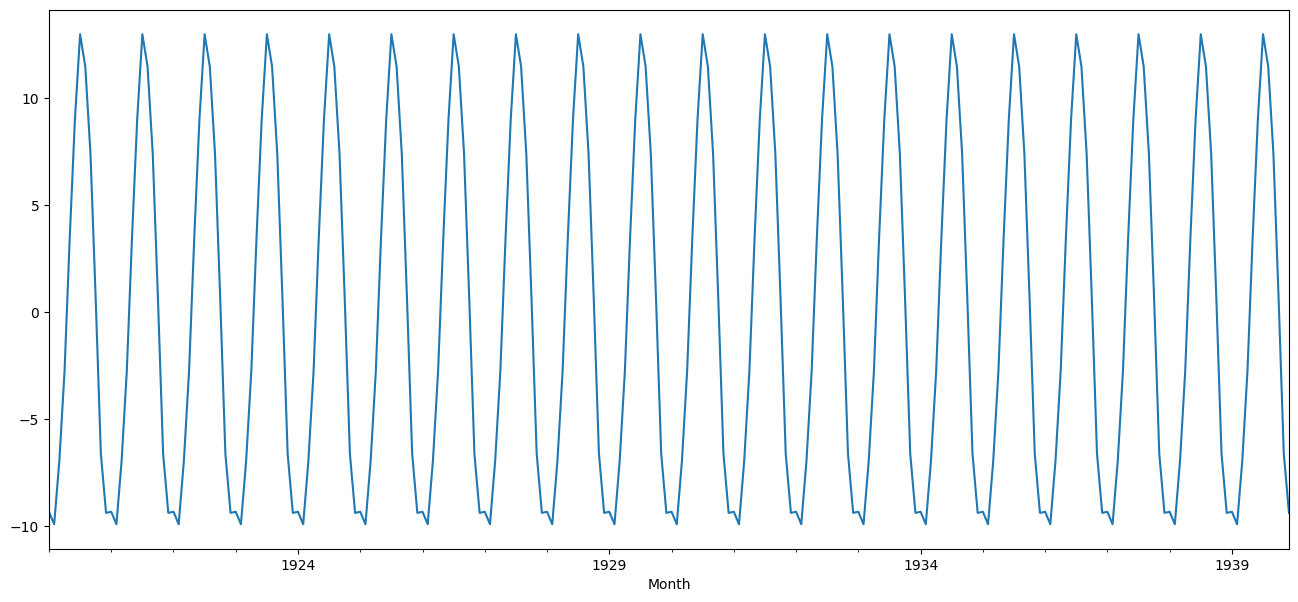

In [39]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

p-value

In [40]:
adf_test = adfuller(df["Temperature"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 0.016989030222609214
it is a stationary process


ARIMA

In [41]:
train_data = df[:len(df)-12]
print(train_data)
test_data = df[len(df)-12:]

            Temperature
Month                  
1920-01-01         40.6
1920-02-01         40.8
1920-03-01         44.4
1920-04-01         46.7
1920-05-01         54.1
...                 ...
1938-08-01         60.4
1938-09-01         57.0
1938-10-01         50.7
1938-11-01         47.8
1938-12-01         39.2

[228 rows x 1 columns]


In [42]:
arima_model = SARIMAX(train_data['Temperature'], order = (2,1,1), seasonal_order = (4,0,3,12))
#arima_model = ARIMA(train_data['Temperature'], order=(5,1,0))
arima_result = arima_model.fit()
arima_result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85407D+00    |proj g|=  4.53421D-01

At iterate    5    f=  2.52862D+00    |proj g|=  1.61990D-01

At iterate   10    f=  2.37172D+00    |proj g|=  5.77355D-02

At iterate   15    f=  2.32745D+00    |proj g|=  7.71010D-03

At iterate   20    f=  2.32219D+00    |proj g|=  8.13542D-03

At iterate   25    f=  2.31394D+00    |proj g|=  7.26697D-03
  ys=-7.708E-05  -gs= 1.941E-04 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     56      1     1     0   1.256D-02   2.313D+00
  F =   2.3133731691810642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                Temperature   No. Observations:                  228
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -527.449
Date:                                    Wed, 17 May 2023   AIC                           1076.898
Time:                                            04:15:37   BIC                           1114.573
Sample:                                        01-01-1920   HQIC                          1092.100
                                             - 12-01-1938                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3156      0.072      4.402      0.000       0.175       0.456
ar.L2          0.0630      0.078      0.811      0.417      -0.089       0.215
ma.L1         -0.9926      0.041    -23.994      0.000      -1.074      -0.912
ar.S.L12      -0.3232      0.152     -2.131      0.033      -0.620      -0.026
ar.S.L24       0.8789      0.224      3.930      0.000       0.441       1.317
ar.S.L36       0.5165      0.165      3.139      0.002       0.194       0.839
ar.S.L48      -0.0769      0.109     -0.705      0.481      -0.291       0.137
ma.S.L12       0.2729      0.153      1.788      0.074      -0.026       0.572
ma.S.L24      -0.5673      0.254     -2.231      0.026      -1.066      -0.069
ma.S.L36      -0.2677      0.180     -1.487      0.137      -0.620       0.085
sigma2         5.0578      0.580      8.725      0.000       3.922       6.194
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.99   Prob(JB):                         0.58
Heteroskedasticity (H):               1.02   Skew:                            -0.11
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1939-01-01    40.124216
1939-02-01    39.254189
1939-03-01    40.864766
1939-04-01    46.687592
1939-05-01    53.125804
1939-06-01    58.713200
1939-07-01    62.570160
1939-08-01    61.624245
1939-09-01    57.178044
1939-10-01    50.215626
1939-11-01    42.327635
1939-12-01    40.167674
Freq: MS, Name: ARIMA Predictions, dtype: float64

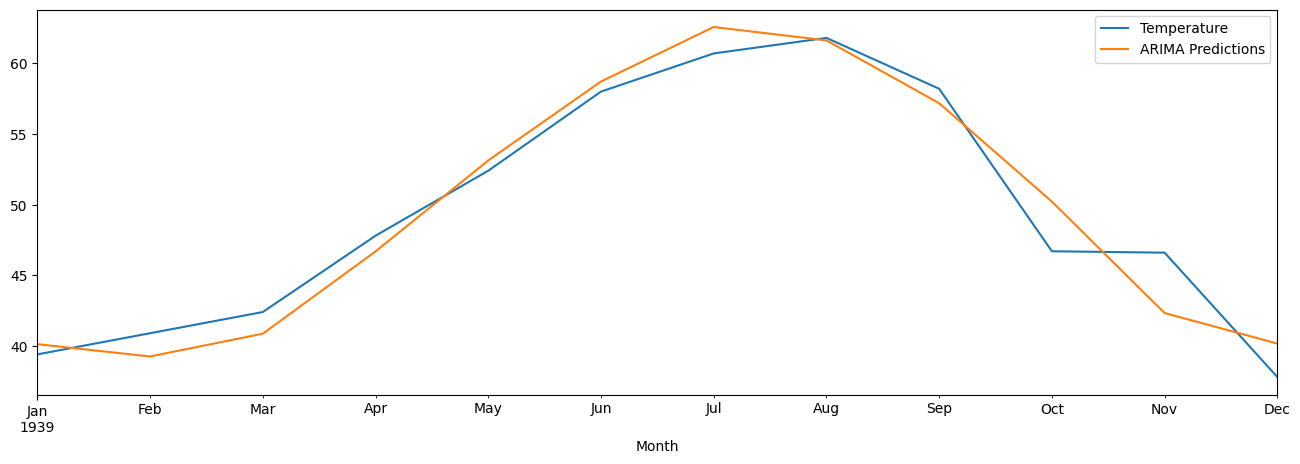

In [44]:
test_data['Temperature'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [45]:
arima_rmse_error = rmse(test_data['Temperature'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Temperature'], arima_pred)
mean_value = df['Temperature'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 4.054534613133534
RMSE Error: 2.013587498256168
Mean: 49.04125


In [46]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

rnn

In [47]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [48]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [49]:
#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________


In [50]:
rnn_model.fit_generator(generator, epochs=25)

Epoch 1/25
216/216 [==============================] - 2s 4ms/step - loss: 0.0778
Epoch 2/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0237
Epoch 3/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0079
Epoch 4/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 5/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 6/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 7/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 8/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 9/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 10/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 11/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 12/25
216/216 [==============================] - 1s 4ms/step - loss: 0.0070
Epoch 13/25
216/216 [====

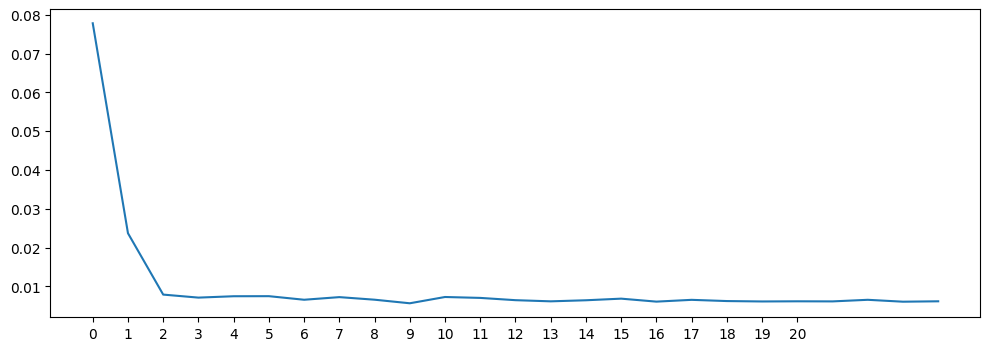

In [51]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [52]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.30681818]
 [0.28125   ]
 [0.45454545]
 [0.43465909]
 [0.59943182]
 [0.78693182]
 [0.80397727]
 [0.82670455]
 [0.73011364]
 [0.55113636]
 [0.46875   ]
 [0.22443182]]
shape is  (12, 1)
current batch
[[[0.30681818]
  [0.28125   ]
  [0.45454545]
  [0.43465909]
  [0.59943182]
  [0.78693182]
  [0.80397727]
  [0.82670455]
  [0.73011364]
  [0.55113636]
  [0.46875   ]
  [0.22443182]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 282ms/step
current_batch now
 [[[0.28125   ]
  [0.45454545]
  [0.43465909]
  [0.59943182]
  [0.78693182]
  [0.80397727]
  [0.82670455]
  [0.73011364]
  [0.55113636]
  [0.46875   ]
  [0.22443182]
  [0.24999669]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 18ms/step
current_batch now
 [[[0.45454545]
  [0.43465909]
  [0.59943182]
  [0.78693182]
  [0.80397727]
  [0.82670455]
  [0.73011364]
  [0.55113636]
  [0.46875   ]
  [0.22443182]
  [0.24999669]
  [0.25707531]]]
current_batch shape
 (1, 12, 1)
1/1 [==============

In [53]:
RNN_Predictions_scaled

[array([0.24999669], dtype=float32),
 array([0.2570753], dtype=float32),
 array([0.3121966], dtype=float32),
 array([0.43160838], dtype=float32),
 array([0.59218115], dtype=float32),
 array([0.7562402], dtype=float32),
 array([0.8605871], dtype=float32),
 array([0.8683672], dtype=float32),
 array([0.7653408], dtype=float32),
 array([0.57812804], dtype=float32),
 array([0.3834629], dtype=float32),
 array([0.27087888], dtype=float32)]

In [54]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [55]:
global_test_data['RNN_Predictions'] = RNN_Predictions

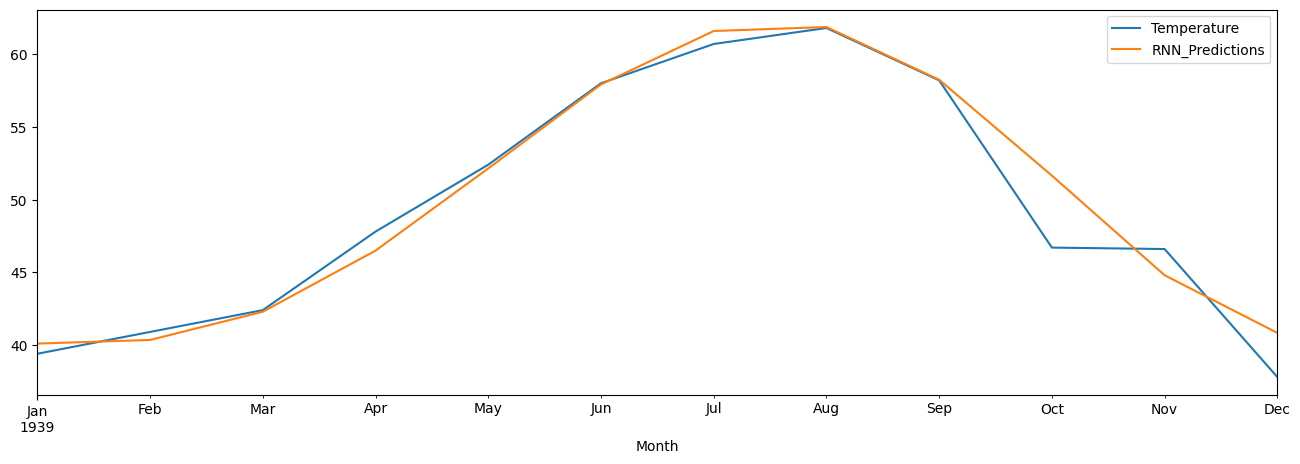

In [56]:
global_test_data['Temperature'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [57]:
rnn_rmse_error = rmse(global_test_data['Temperature'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Temperature'], global_test_data["RNN_Predictions"])
mean_value = df['Temperature'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 3.362612135419594
RMSE Error: 1.8337426579047547
Mean: 49.04125


In [58]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [59]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

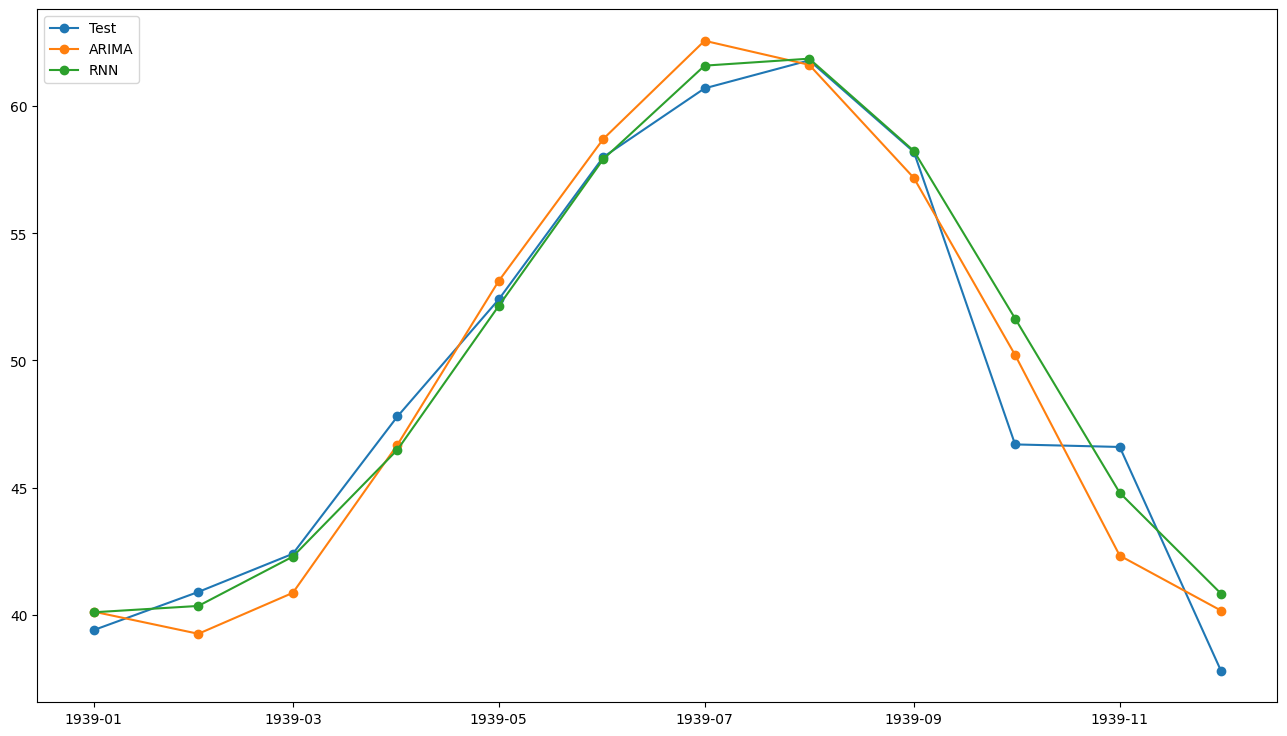

In [60]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Temperature"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [61]:
print(f"Mean: {global_test_data['Temperature'].mean()}")
errors

Mean: 49.39166666666666


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,2.013587,4.054535,1.640017
1,RNN,1.833743,3.362612,1.149234


In [62]:
global_test_data

,Temperature,ARIMA_Predictions,RNN_Predictions
Month,,,
1939-01-01,39.4,40.124216,40.099884
1939-02-01,40.9,39.254189,40.349051
1939-03-01,42.4,40.864766,42.289321
1939-04-01,47.8,46.687592,46.492615
1939-05-01,52.4,53.125804,52.144776
1939-06-01,58.0,58.713200,57.919655
1939-07-01,60.7,62.570160,61.592667
1939-08-01,61.8,61.624245,61.866525
1939-09-01,58.2,57.178044,58.239996
